# 移動ロボットの状態遷移（ノイズなし）

千葉工業大学 上田 隆一

(c) 2017 Ryuichi Ueda

This software is released under the MIT License, see LICENSE.

## はじめに

このコードは、移動ロボットの移動の簡単なモデルです。


In [1]:
%matplotlib inline
import numpy as np
import math, random
import matplotlib.pyplot as plt                   #   for plotting data

### ばらつき

つぎのルールにしたがってロボットの移動量に雑音を混入してみる。

* 指令値を中心に、ガウス分布にしたがって次のようにばらつく
  * 前進するとき
    * 距離が距離に対して10%の標準偏差でばらつく
    * 向きが標準偏差3[deg]でばらつく
  * 向きを変えるとき
    * 変える向きの角度に対して10%の標準偏差でばらつく


### 状態方程式に対応する関数

下の例について、関数fを書きましょう。

```python
old_x = np.array([0,0,0])    # 今回は不要だがnumpyを使用
u = np.array([0.1,10/180*math.pi]) # 毎回0.1だけ進めて10[deg]向きを変える

def f(x_old,u):
    なにかコードを書く
    return x_new
```

#### 解答例

In [2]:
def f(x_old,u):
    # わかりにくいのでバラす
    pos_x, pos_y, pos_theta = x_old
    act_fw, act_rot = u
    
    act_fw = random.gauss(act_fw,act_fw/10)
    dir_error = random.gauss(0.0, math.pi / 180.0 * 3.0)
    act_rot = random.gauss(act_rot,act_rot/10)
    
    pos_x += act_fw * math.cos(pos_theta + dir_error)
    pos_y += act_fw * math.sin(pos_theta + dir_error)
    pos_theta += act_rot
    
    return np.array([pos_x,pos_y,pos_theta])

### 実行！

10ステップ動貸してみましょう。

In [3]:
x = np.array([0,0,0])
u = np.array([0.1,10/180*math.pi]) # 毎回0.1だけ進めて10[deg]向きを変える
print(x)
for i in range(10):
    x = f(x,u)
    print(x)

[0 0 0]
[ 0.11101391  0.01316534  0.20062588]
[ 0.21667561  0.03772248  0.36210264]
[ 0.30714191  0.06797028  0.53692128]
[ 0.38194774  0.11808143  0.72018441]
[ 0.45733798  0.17144363  0.89551629]
[ 0.5062014   0.23616994  1.07167283]
[ 0.55316268  0.32808052  1.24928927]
[ 0.59204397  0.42298333  1.41256331]
[ 0.61068586  0.52827197  1.60383144]
[ 0.60807198  0.62990338  1.78279156]


### わからんので描画

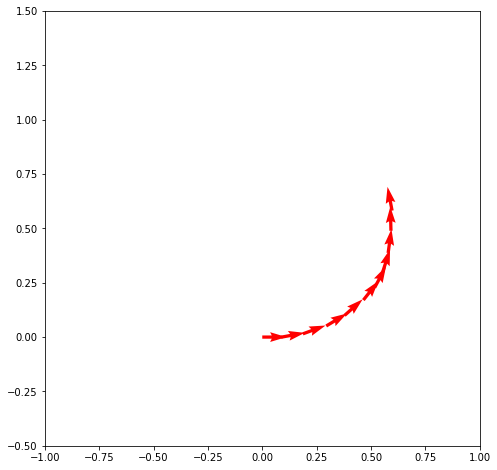

In [7]:
x = np.array([0,0,0])
u = np.array([0.1,10/180*math.pi]) # 毎回0.1だけ進めて10[deg]向きを変える

path = [x]
for i in range(10):
    x = f(x,u)
    path.append(x)

fig = plt.figure(i,figsize=(8, 8))
sp = fig.add_subplot(111, aspect='equal')
sp.set_xlim(-1.0,1.0)
sp.set_ylim(-0.5,1.5)
        
xs = [e[0] for e in path]
ys = [e[1] for e in path]
vxs = [math.cos(e[2]) for e in path]
vys = [math.sin(e[2]) for e in path]
plt.quiver(xs,ys,vxs,vys,color="red",label="actual robot motion")

## 10ステップ後の姿勢のばらつき

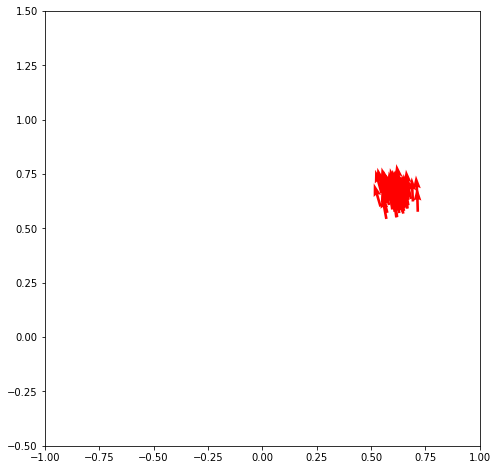

In [8]:
path = []

for j in range(100):
    x = np.array([0,0,0])
    u = np.array([0.1,10/180*math.pi]) # 毎回0.1だけ進めて10[deg]向きを変える

    for i in range(10):
        x = f(x,u)
        
    path.append(x)

fig = plt.figure(i,figsize=(8, 8))
sp = fig.add_subplot(111, aspect='equal')
sp.set_xlim(-1.0,1.0)
sp.set_ylim(-0.5,1.5)
        
xs = [e[0] for e in path]
ys = [e[1] for e in path]
vxs = [math.cos(e[2]) for e in path]
vys = [math.sin(e[2]) for e in path]
plt.quiver(xs,ys,vxs,vys,color="red",label="actual robot motion")